<a href="https://colab.research.google.com/github/Rickmwasofficial/Learning-Machine-Learning/blob/main/Binary_Classification_of_Insurance_Cross_Selling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary Classification of Insurance Cross Selling. (Kaggle Playground Series Competition)
The objective of this competition is to predict which customers respond positively to an automobile insurance offer.

In [ ]:
# Import necessary packages and read the files
import pandas as pd
import numpy as np
import tensorflow as tf
import zipfile
print("GPU is", "avalaible" if tf.config.list_physical_devices('GPU') else "not available")

with zipfile.ZipFile('/content/drive/MyDrive/Binary Classification of Insurance Cross Selling/train.csv.zip', 'r') as zip_ref:
    train_df = pd.read_csv(zip_ref.open('train.csv'))

test_df = pd.read_csv('/content/drive/MyDrive/Binary Classification of Insurance Cross Selling/test.csv')


GPU is avalaible


In [ ]:
# View the data
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
test_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [ ]:
len(train_df), len(test_df)

(11504798, 7669866)

In [ ]:
train_df.Gender.value_counts()

,count
Gender,
Male,6228134
Female,5276664


In [ ]:
train_df.isna()

NameError: name 'train_df' is not defined

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [ ]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [ ]:
train_df.Age.mean()

38.38356336199905

In [ ]:
train_df.Response.value_counts()

,count
Response,
0,10089739
1,1415059


In [ ]:
train_df.isna().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


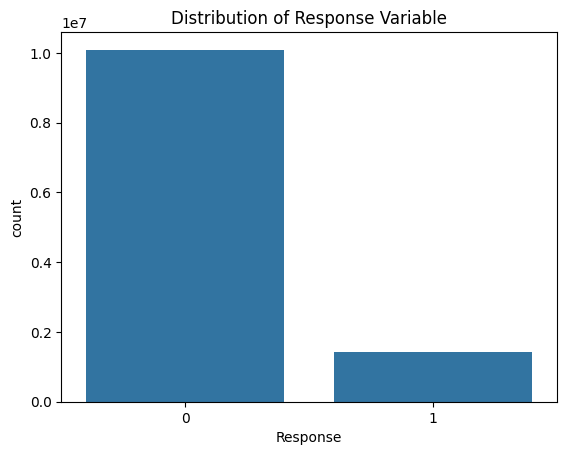

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Response', data=train_df)
plt.title('Distribution of Response Variable')
plt.show()

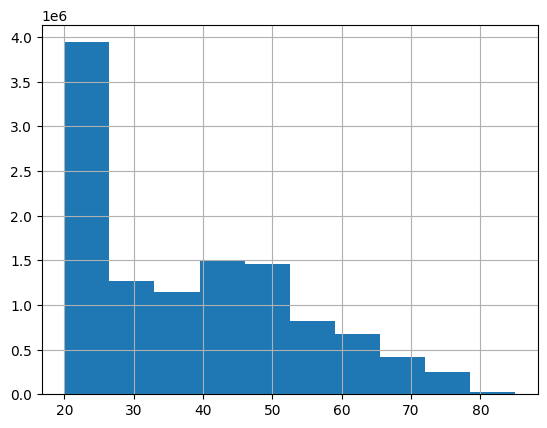

In [ ]:
train_df.Age.hist();

In [ ]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
train_df.drop('id', axis=1, inplace=True)

In [ ]:
train_df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [ ]:
# Split the datafor training and validation
from sklearn.model_selection import train_test_split

X = train_df.drop('Response', axis=1)
y = train_df.Response

y.head()

,Response
0,0
1,1
2,0
3,0
4,0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X.copy(), y.copy(), test_size=0.2)  # Use copies
len(X_train), len(X_val), len(y_train), len(y_val)
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
train_df

In [ ]:
# Scale the values and one hot encode non numerical columns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer



ct = make_column_transformer(
    (MinMaxScaler(), ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']),
    (OneHotEncoder(handle_unknown='ignore'), ['Vehicle_Damage', 'Vehicle_Age', 'Gender'])
)

ct.fit(X_train)

X_train = ct.transform(X_train)
X_val = ct.transform(X_val)

In [ ]:

# Modelling

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics= ['accuracy']
)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(32)

model_1.fit(train_ds, epochs=5)
# Save the model in .keras format
model_1.save('my_model_2.keras')

Epoch 1/5
287620/287620 ━━━━━━━━━━━━━━━━━━━━ 613s 2ms/step - accuracy: 0.8770 - loss: 0.3734
Epoch 2/5
287620/287620 ━━━━━━━━━━━━━━━━━━━━ 607s 2ms/step - accuracy: 0.8770 - loss: 0.3731
Epoch 3/5
121024/287620 ━━━━━━━━━━━━━━━━━━━━ 5:42 2ms/step - accuracy: 0.8770 - loss: 0.3730

In [ ]:
# evaluation
from sklearn.metrics import roc_curve, auc

y_preds = model_1.predict(X_val)

fpr, tpr, thresholds = roc_curve(y_val, y_preds)
auc_value = auc(fpr, tpr)
print("AUC:", auc_value)

71905/71905 ━━━━━━━━━━━━━━━━━━━━ 94s 1ms/step
AUC: 0.8401727576564803


In [ ]:
model_1.evaluate(X_val, y_val)

71905/71905 ━━━━━━━━━━━━━━━━━━━━ 123s 2ms/step - accuracy: 0.8771 - loss: 0.2760


[0.27633440494537354, 0.8770143985748291]

In [ ]:
predictions = y_preds[:,0]
ids = [i for i in range(len(X_val))]
len(predictions), len(ids)
# Create a DataFrame
df_1 = pd.DataFrame({'id': ids, 'Response': predictions})


In [ ]:
df_1

,id,Response
0,0,0.301771
1,1,0.012591
2,2,0.155778
3,3,0.001096
4,4,0.036193
...,...,...
2300955,2300955,0.328937
2300956,2300956,0.005573
2300957,2300957,0.337224
2300958,2300958,0.000692


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_1 = load_model('/content/my_model.keras')

In [ ]:

test = ct.transform(test_df)

test_preds = model_1.predict(test)




239684/239684 ━━━━━━━━━━━━━━━━━━━━ 333s 1ms/step


In [ ]:
predictions = test_preds[:,0]
ids = test_df.id
len(predictions), len(ids)
# Create a DataFrame
df_2 = pd.DataFrame({'id': ids, 'Response': predictions})
df_2

,id,Response
0,0,0.001156
1,1,0.243891
2,2,0.239231
3,3,0.001376
4,4,0.004109
...,...,...
7669861,7669861,0.176472
7669862,7669862,0.003359
7669863,7669863,0.006372
7669864,7669864,0.329850


In [ ]:
df_2.to_csv('/content/submission.csv', index=False)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/submission.csv')
data.head()

,id,Response
0,0,0.001156
1,1,0.243891
2,2,0.239231
3,3,0.001376
4,4,0.004109


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/Binary Classification of Insurance Cross Selling/test.csv')
data2.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [ ]:
data.id = data2.id

In [ ]:
data.head()

,id,Response
0,11504798,0.001156
1,11504799,0.243891
2,11504800,0.239231
3,11504801,0.001376
4,11504802,0.004109


In [ ]:
data.to_csv('/content/drive/MyDrive/submission2.csv', index=False)